In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.autograd import Variable
%load_ext autoreload
%autoreload 2

In [2]:
# Defining a toy dataset
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                        [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

## Linear regression

In [3]:
class MyLinearRegression:
    def __init__(self):
        # TODO: Define the parameters of the model (weights and biases)
        self.w = Variable(torch.Tensor([0]), requires_grad=True)
        self.b = Variable(torch.Tensor([0]), requires_grad=True)
    
    def forward(self, x):
        # TODO: implement forward computation - compute predictions based on the inputs
        return self.w * x + self.b
    
    def parameters(self):
        # TODO: this function should return a list of parameters of the model
        return [self.w, self.b]
    
    def __call__(self, x):
        # Convenience function
        return self.forward(x)
    

def mselossfunc(pred, y):
    # TODO: implement the MSE loss function
    return (pred - y).pow(2).mean()

model = MyLinearRegression()
numpy_inputs = np.asarray([0.0, 1.0, 2.0], dtype = np.float32)
torch_inputs = Variable(torch.from_numpy(numpy_inputs))
torch_outputs = model(torch_inputs)
print("Testing model: an input of %s gives a prediction:\n %s" % (numpy_inputs, torch_outputs))

Testing model: an input of [ 0.  1.  2.] gives a prediction:
 Variable containing:
 0
 0
 0
[torch.FloatTensor of size 3]



In [4]:
def train(features, labels, model, lossfunc, optimizer, num_epoch):

    for epoch in range(num_epoch):
        
        # TODO: Step 1 - create torch variables corresponding to features and labels
        inputs = Variable(torch.from_numpy(features))
        targets = Variable(torch.from_numpy(labels))

        # TODO: Step 2 - compute model predictions and loss
        outputs = model(inputs)
        loss = lossfunc(outputs, targets)
        
        # TODO: Step 3 - do a backward pass and a gradient update step
        optimizer.zero_grad()  
        loss.backward()
        optimizer.step()
        
        if epoch % 10 == 0:
            print ('Epoch [%d/%d], Loss: %.4f' 
                   %(epoch+1, num_epoch, loss.data[0]))
        
        
def visualize(x_train, y_train, model):
    # A convenience function for visualizing predictions given by the model

    predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
    order = np.argsort(x_train, axis = 0)
    plt.plot(x_train[order].flatten(), y_train[order].flatten(), 'ro', label='Original data')
    plt.plot(x_train[order].flatten(), predicted[order].flatten(), label='Fitted line')
    plt.legend()
    plt.show()

Epoch [1/50], Loss: 5.9467
Epoch [11/50], Loss: 1.1699
Epoch [21/50], Loss: 0.3857
Epoch [31/50], Loss: 0.2567
Epoch [41/50], Loss: 0.2352


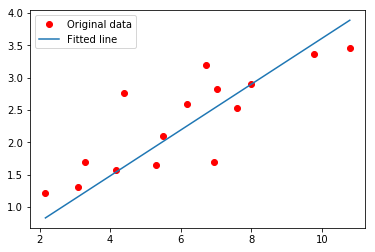

In [5]:
# Training and visualizing predictions made by linear regression model
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

train(features = x_train,
      labels = y_train,
      model = model,
      lossfunc = mselossfunc, 
      optimizer = optimizer,
      num_epoch = 50)

visualize(x_train, y_train, model)

## Linear Regression (using nn package)

Epoch [1/100], Loss: 9.5920
Epoch [11/100], Loss: 1.8028
Epoch [21/100], Loss: 0.5240
Epoch [31/100], Loss: 0.3137
Epoch [41/100], Loss: 0.2787
Epoch [51/100], Loss: 0.2725
Epoch [61/100], Loss: 0.2711
Epoch [71/100], Loss: 0.2704
Epoch [81/100], Loss: 0.2699
Epoch [91/100], Loss: 0.2694


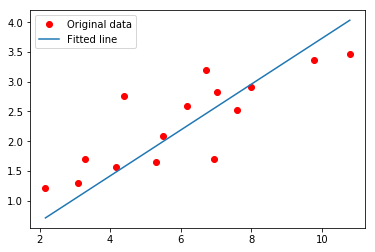

In [8]:
class NNLinearRegression(nn.Module):
    def __init__(self):
        super(NNLinearRegression, self).__init__()
        # TODO: Define the parameters of the model (linear nn layer)
        self.linear = nn.Linear(1, 1)
    
    def forward(self, x):
        # TODO: implement forward computation
        return self.linear(x)
    
# Training and visualizing predictions made by linear regression model (nn package)
# TODO: use loss function from nn package
lossfunc = nn.MSELoss()

model = NNLinearRegression()

optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

train(features = x_train,
      labels = y_train,
      model = model,
      lossfunc = lossfunc,
      optimizer = optimizer,
      num_epoch = 100)
visualize(x_train, y_train, model)

## MLP

Epoch [1/300], Loss: 7.1076
Epoch [11/300], Loss: 0.8348
Epoch [21/300], Loss: 0.8076
Epoch [31/300], Loss: 0.6584
Epoch [41/300], Loss: 0.5361
Epoch [51/300], Loss: 0.4414
Epoch [61/300], Loss: 0.2747
Epoch [71/300], Loss: 0.2095
Epoch [81/300], Loss: 0.1897
Epoch [91/300], Loss: 0.1832
Epoch [101/300], Loss: 0.1814
Epoch [111/300], Loss: 0.1804
Epoch [121/300], Loss: 0.1800
Epoch [131/300], Loss: 0.1797
Epoch [141/300], Loss: 0.1794
Epoch [151/300], Loss: 0.1792
Epoch [161/300], Loss: 0.1790
Epoch [171/300], Loss: 0.1788
Epoch [181/300], Loss: 0.1786
Epoch [191/300], Loss: 0.1784
Epoch [201/300], Loss: 0.1782
Epoch [211/300], Loss: 0.1780
Epoch [221/300], Loss: 0.1778
Epoch [231/300], Loss: 0.1776
Epoch [241/300], Loss: 0.1774
Epoch [251/300], Loss: 0.1773
Epoch [261/300], Loss: 0.1771
Epoch [271/300], Loss: 0.1769
Epoch [281/300], Loss: 0.1768
Epoch [291/300], Loss: 0.1766


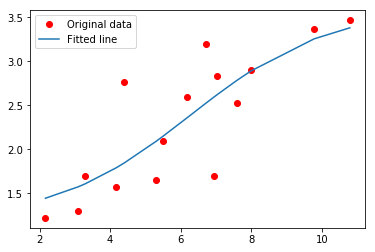

In [9]:
class MLP(nn.Module):
    def __init__(self, hidden_size):
        super(MLP, self).__init__()
        # TODO: Define parameters / layers of a multi-layered perceptron with one hidden layer
        self.fc1 = nn.Linear(1, hidden_size)
        self.relu = nn.Sigmoid()
        self.fc2 = nn.Linear(hidden_size, 1) 
    
    def forward(self, x):
        out = self.fc2(self.relu(self.fc1(x)))
        return out
    
# TODO: Play with learning rate, hidden size, and optimizer type for multi-layered perceptron
hidden_size = 2
learning_rate = 1e-1


model = MLP(hidden_size = hidden_size)

optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

train(features = x_train,
      labels = y_train,
      model = model,
      lossfunc = lossfunc,
      optimizer = optimizer,
      num_epoch = 300)
visualize(x_train, y_train, model)